# **Credit Card Fraud Detection Project**

## **Problem Statement**

The objective of this project is to build a machine learning model capable of accurately identifying fraudulent credit card transactions. This is crucial for credit card companies to prevent financial losses for both the company and its customers.

### **Dataset Information**

- **Dataset Name:** creditcard.csv
- **Source:** This dataset provided on Kaggle by the Machine Learning Group - ULB (Université Libre de Bruxelles).
    - [Kaggle Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- The dataset contains anonymized credit card transactions from September 2013 by European cardholders.
- It includes transactions over two days, with a significant class imbalance: 492 frauds out of 284,807 transactions (fraudulent transactions account for approximately 0.172% of all transactions).
- All input variables (V1-V28) are the result of a PCA transformation due to confidentiality.
- **'Time'**: Seconds elapsed between each transaction and the first transaction in the dataset.
- **'Amount'**: Transaction amount.
- **'Class'**: The target variable (0 for genuine, 1 for fraudulent).

### **Evaluation Metric:**
Given the severe class imbalance, standard accuracy is not a meaningful evaluation metric. We will primarily use the **Area Under the ROC Curve (ROC-AUC)** to assess model performance. Other important metrics will include Precision, Recall, F1-score, and a Confusion Matrix.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## **Read data**

In [23]:
# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('datasets/creditcard.csv')

### **Check the data**

In [24]:
df.shape

(284807, 31)

- The dataset is correctly loaded and contains 284807 rows and 31 columns which exactly matches the expected dimensions given in the dataset information.

### **Examine the data**

In [25]:
# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [26]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Looking to the Time feature, we can confirm that the data contains 284,807 transactions, during 2 consecutive days (or 172792 seconds).

### **Check for missing values**

In [27]:
missing_values = pd.DataFrame(df.isnull().sum(), columns=['Total Missing'])
missing_values['Percentage'] = (missing_values['Total Missing'] / df.shape[0]) * 100
missing_values.sort_values(by='Percentage', ascending=False, inplace=True)
missing_values.transpose()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total Missing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percentage,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- There is no missing data in the entire dataset.

### **Check the data types**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- All columns have the correct data types, with 30 float64 columns, 1 int64 columns.

### **Check for duplicate rows**

In [29]:
duplicate_count = df.duplicated().sum()
duplicate_percentage = (df.duplicated().sum() / len(df)) * 100

print(f"Number of duplicate rows: {duplicate_count}")
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")

Number of duplicate rows: 1081
Percentage of duplicate rows: 0.38%


- There are 1081 duplicate rows in the dataset. While duplicate transactions can sometimes occur legitimately, in fraud detection, they can also represent anomalies or data collection issues.
- We are assuming these duplicates are legitimate transactions.

### **Check for class imbalance**

In [30]:
# Checking for data imbalance in the target variable 'Class'
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100
class_distribution = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})
class_distribution

,Count,Percentage
Class,,
0,284315,99.827251
1,492,0.172749


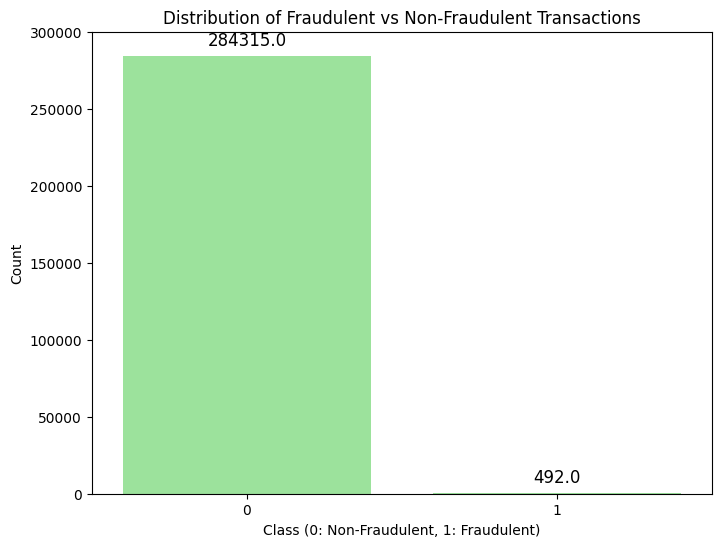

In [31]:
# Count Plot for Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, color='lightgreen')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.ylim(0, 300000)
# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

- Only 492 (or 0.172%) of transaction are fraudulent. That means the data is highly imbalanced with respect with target variable Class.

## **Data Exploration**

### **Transactions in time**

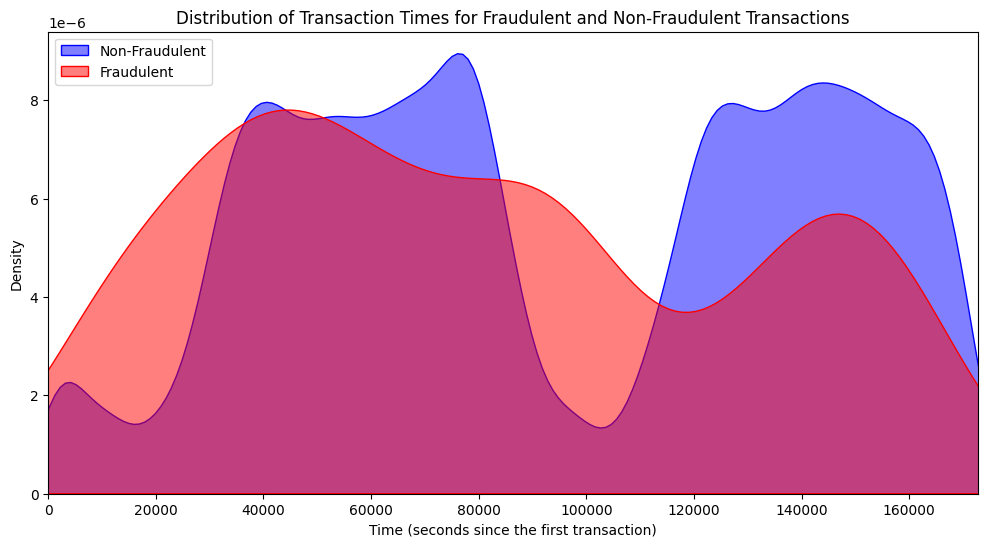

In [39]:
# Distribution of Transaction Times
plt.figure(figsize=(12, 6))
sns.kdeplot(df[df['Class'] == 0]['Time'], label='Non-Fraudulent', color='blue', fill=True, alpha=0.5)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraudulent', color='red', fill=True, alpha=0.5)
plt.title('Distribution of Transaction Times for Fraudulent and Non-Fraudulent Transactions')
plt.xlabel('Time (seconds since the first transaction)')
plt.ylabel('Density')
plt.xlim(df['Time'].min(), df['Time'].max())
plt.legend()
plt.show()

- Fraudulent transactions have a distribution more even than valid transactions - are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

In [ ]:
# Let's create new hourly feature from the 'Time' column
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

# Grouping by Hour and Class to get aggregate statistics and store in a new DataFrame
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_tmp = pd.DataFrame(tmp)
df_tmp.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_tmp.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [40]:
df_tmp.tail()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
89,45.0,1,12.31,39.98,2,52.29,26.145000,26.145,382.814450
90,46.0,0,0.00,25691.16,6458,449369.58,69.583397,15.000,132269.354973
91,46.0,1,0.00,634.30,6,1433.23,238.871667,194.490,67185.062017
92,47.0,0,0.00,10199.44,4852,333212.69,68.675328,14.000,56123.940988
93,47.0,1,0.76,245.00,4,366.18,91.545000,60.210,11459.760833


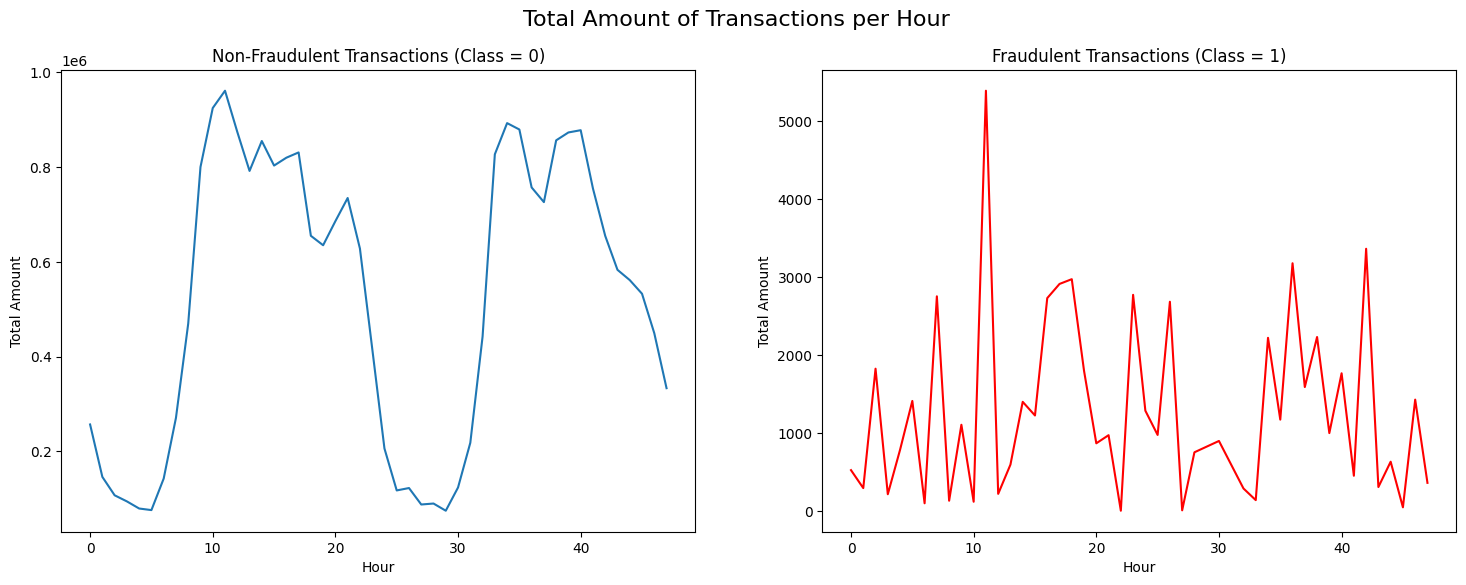

In [88]:
# Plotting the total amount of transactions per hour for both classes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Amount of Transactions per Hour", fontsize=16)
ax1.set_title("Non-Fraudulent Transactions (Class = 0)")
ax2.set_title("Fraudulent Transactions (Class = 1)")
ax1.set_ylabel("Total Amount")
ax2.set_ylabel("Total Amount")
plt.show()

- Non-fraudulent transactions show clear business hour patterns with peaks around hours 10-15 and 35-40, while fraudulent transactions have much lower total amounts and more unpredictable patterns, suggesting fraudsters prefer smaller amounts to avoid detection and don't follow typical business hour patterns.

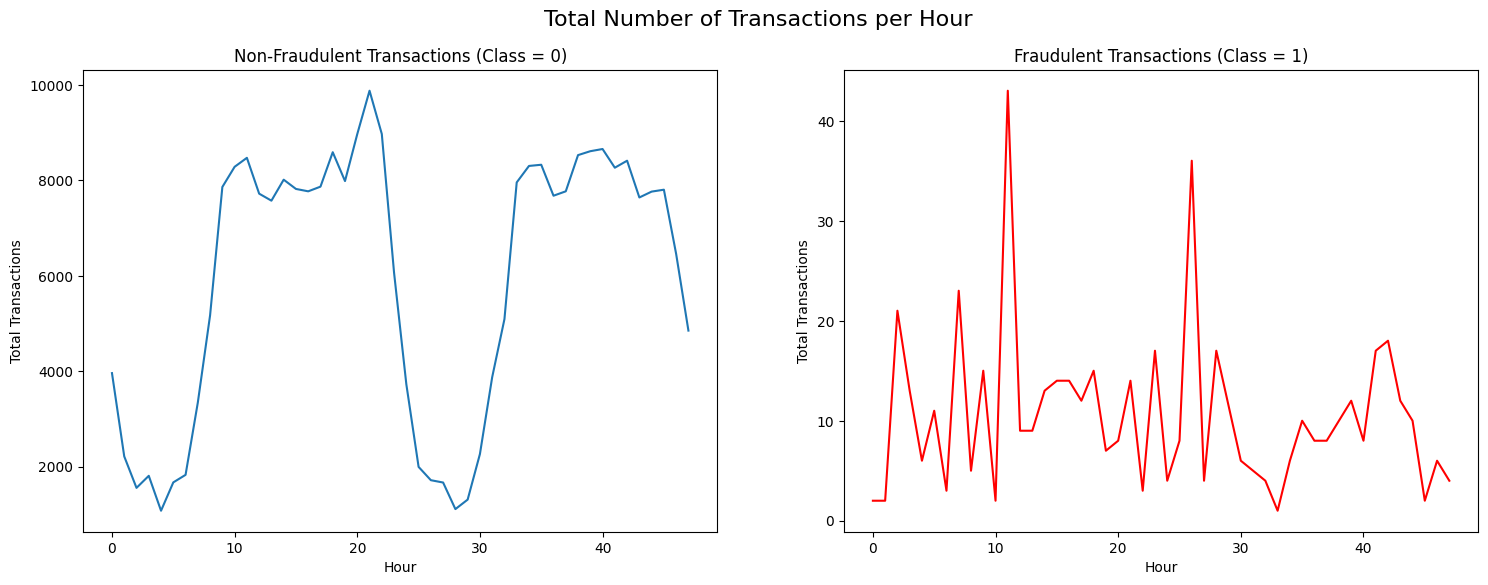

In [87]:
# Plotting the total number of transactions per hour for both classes
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df_tmp.loc[df_tmp.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.suptitle("Total Number of Transactions per Hour", fontsize=16)
ax1.set_title("Non-Fraudulent Transactions (Class = 0)")
ax2.set_title("Fraudulent Transactions (Class = 1)")
ax1.set_ylabel("Total Transactions")
ax2.set_ylabel("Total Transactions")
plt.show()

- Non-fraudulent transactions peaks around 10,000 transactions during active hours (10-20 and 35-45), while fraudulent transactions remain consistently low (under 50 per hour) with infrequent sudden increases, indicating fraud attempts are relatively rare and don't correlate with legitimate business activity patterns.

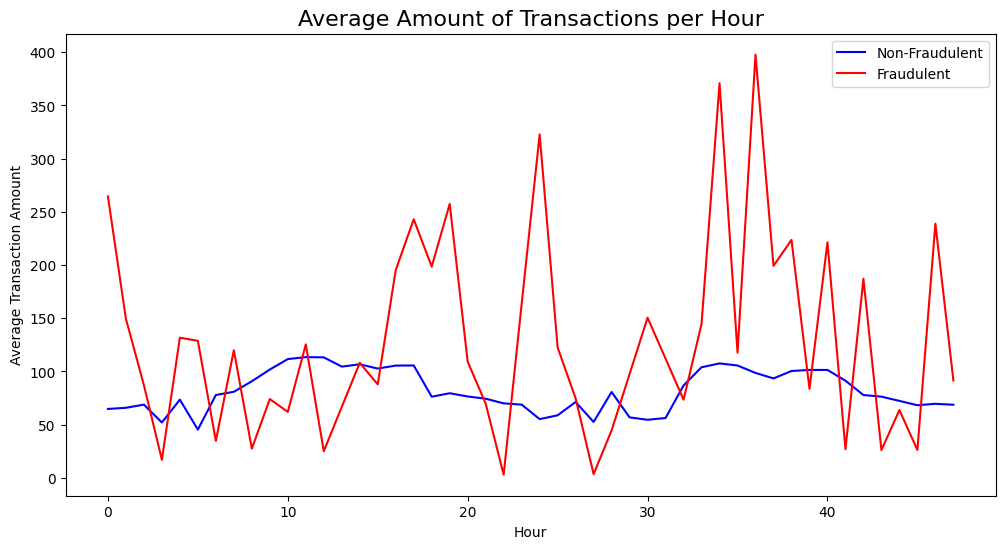

In [91]:
# Plotting the average transaction amount per hour for both classes
plt.figure(figsize=(12, 6))
sns.lineplot(x="Hour", y="Mean", data=df_tmp.loc[df_tmp.Class==0], label='Non-Fraudulent', color='blue')
sns.lineplot( x="Hour", y="Mean", data=df_tmp.loc[df_tmp.Class==1], color="red", label='Fraudulent')
plt.title("Average Amount of Transactions per Hour", fontsize=16)
plt.ylabel('Average Transaction Amount')
plt.show()

- Non-fraudulent transactions maintain relatively stable average amounts (~$65-110) throughout all hours, while fraudulent transactions show highly volatile average amounts with extreme spikes reaching $400, suggesting fraudsters occasionally attempt high-value transactions but this behavior is inconsistent and unpredictable across different time periods.

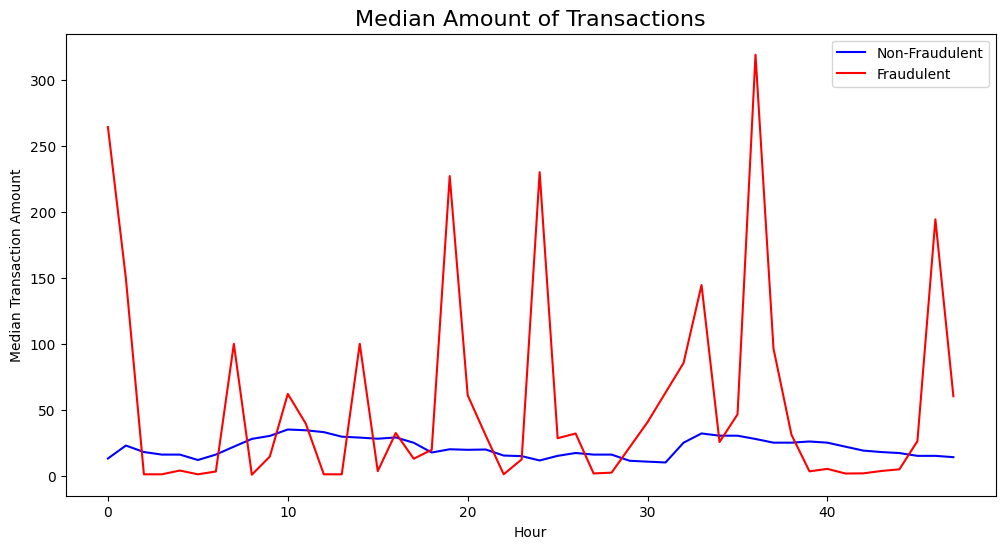

In [93]:
# Plotting the median transaction amount per hour for both classes
plt.figure(figsize=(12, 6))
sns.lineplot(x="Hour", y="Median", data=df_tmp.loc[df_tmp.Class==0], label='Non-Fraudulent', color='blue')
s = sns.lineplot(x="Hour", y="Median", data=df_tmp.loc[df_tmp.Class==1], color="red", label='Fraudulent')
plt.ylabel('Median Transaction Amount')
plt.title("Median Amount of Transactions", fontsize=16)
plt.show()

- Non-fraudulent transactions show remarkably stable median amounts (consistently around $15-30) across all hours, while fraudulent transactions exhibit extreme volatility with medians ranging from near $0 to over $300, indicating that typical fraud amounts vary dramatically and unpredictably, making median-based detection challenging but potentially useful for identifying unusual patterns.

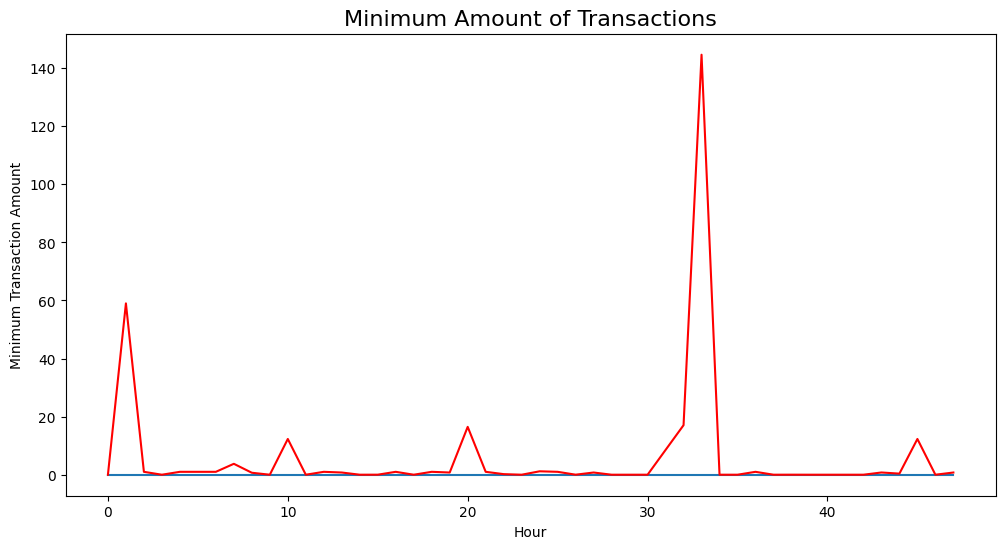

In [96]:
# Plotting the minimum transaction amount per hour for both classes
plt.figure(figsize=(12, 6))
sns.lineplot(x="Hour", y="Min", data=df_tmp.loc[df_tmp.Class==0])
sns.lineplot(x="Hour", y="Min", data=df_tmp.loc[df_tmp.Class==1], color="red")
plt.ylabel('Minimum Transaction Amount')
plt.title("Minimum Amount of Transactions", fontsize=16)
plt.show()

- Both non-fraudulent and fraudulent transactions have minimum amounts consistently at or near $0 across most hours, but fraudulent transactions show occasional dramatic spikes in minimum amounts (reaching $60 and $140+), suggesting that during certain periods, fraudsters may coordinate attacks with higher minimum thresholds, possibly targeting specific merchant categories or testing higher-value fraud strategies.

### **Transactions Amount**

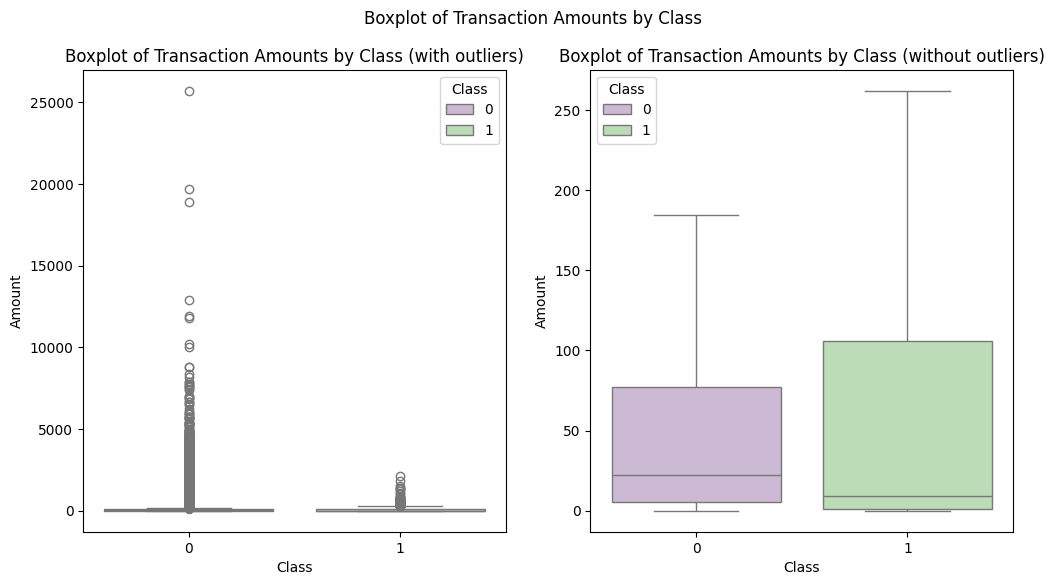

In [98]:
# Plotting boxplots for transaction amounts by class
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
ax1.set_title("Boxplot of Transaction Amounts by Class (with outliers)")
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
ax2.set_title("Boxplot of Transaction Amounts by Class (without outliers)")
plt.suptitle("Boxplot of Transaction Amounts by Class")
plt.show()

- Real transactions show significantly more extreme outliers (up to $25,000) while fraudulent transactions have a lower median and fewer high-value outliers, suggesting fraudsters prefer smaller amounts to avoid detection systems.

In [ ]:
# Statistical summary of transaction amounts for each class
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']

# Displaying the statistical summary for class 0 (non-fraudulent transactions)
class_0.describe().round(2)

count    284315.00
mean         88.29
std         250.11
min           0.00
25%           5.65
50%          22.00
75%          77.05
max       25691.16
Name: Amount, dtype: float64

In [101]:
# Displaying the statistical summary for class 1 (fraudulent transactions)
class_1.describe().round(2)

count     492.00
mean      122.21
std       256.68
min         0.00
25%         1.00
50%         9.25
75%       105.89
max      2125.87
Name: Amount, dtype: float64

- The fraudulent transactions have a lower median value than the real transactions but the mean is higher, indicating that while most fraudulent transactions are smaller, there are occasional high-value fraud attempts that skew the mean upwards.

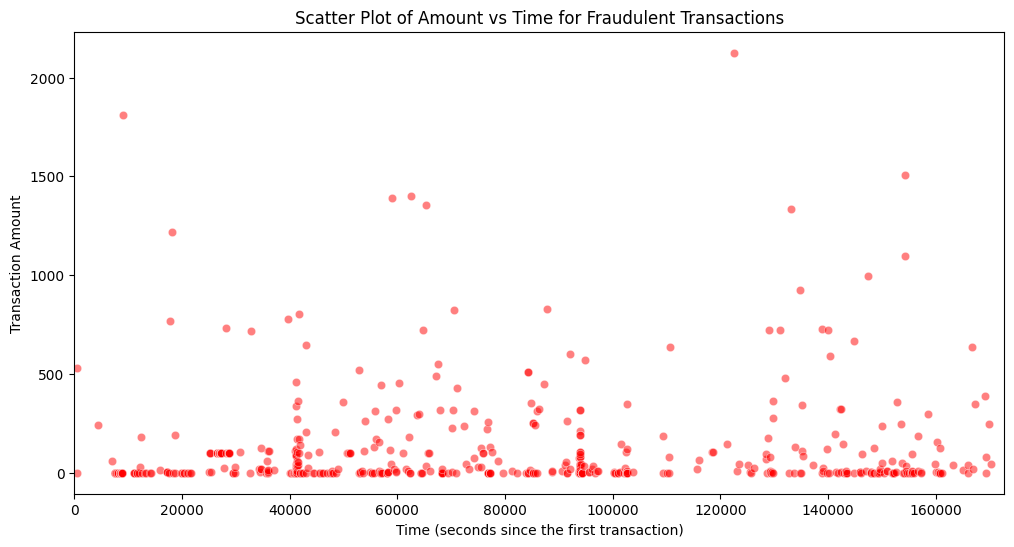

In [102]:
# Scatter plot of Amount vs Time for fraudulent transactions
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Time', y='Amount', data=df[df['Class'] == 1], alpha=0.5, color='red')
plt.title('Scatter Plot of Amount vs Time for Fraudulent Transactions')
plt.xlabel('Time (seconds since the first transaction)')
plt.ylabel('Transaction Amount')
plt.xlim(df['Time'].min(), df['Time'].max())
plt.show()

- Fraudulent transactions occur throughout the entire 48-hour period with most amounts concentrated below $500, but notable high-value fraud attempts ($1,000-$2,000+) appear occurring at irregular intervals across all time periods, suggesting fraudsters operate continuously without specific time preferences.

### **Features Correlation**

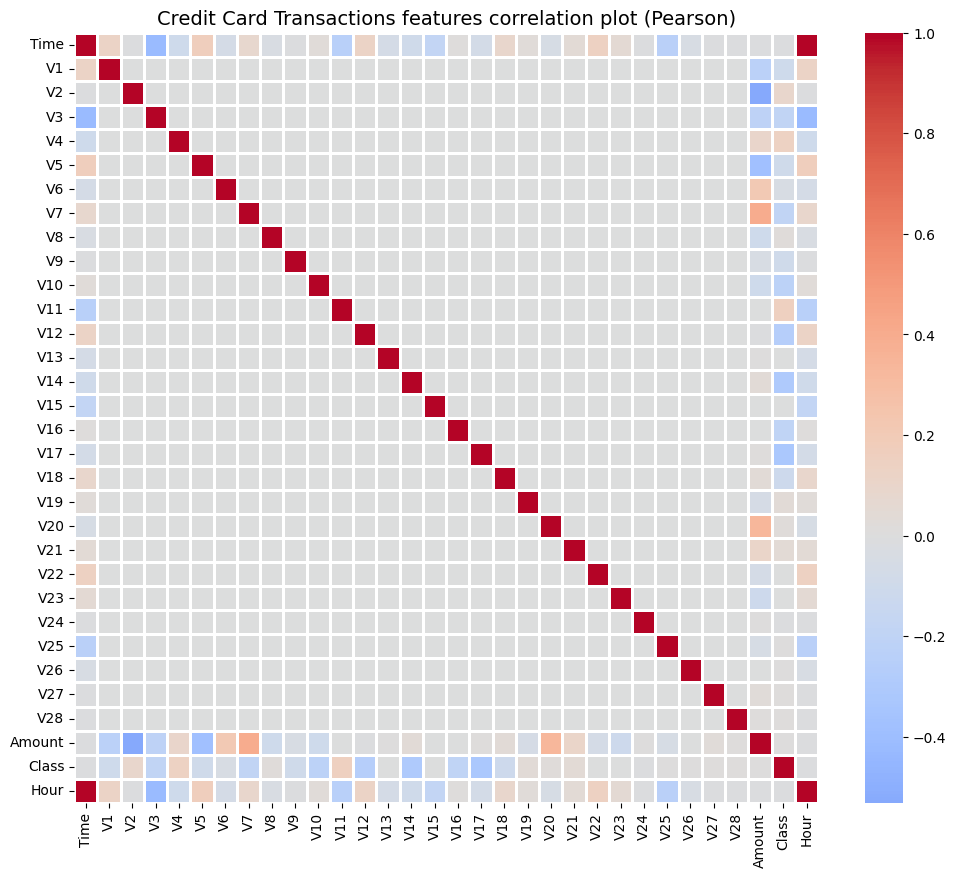

In [79]:
# Compute the Correlation Matrix
correlation_matrix = df.corr()

# Visualize the Correlation Matrix with a Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, linewidths=1)
plt.title('Credit Card Transactions features correlation plot (Pearson)', fontsize=14)
plt.show()

- As expected, there is no notable correlation between features V1-V28. There are certain correlations between some of these features and Time (inverse correlation with V3) and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

### **Features Density Plots**

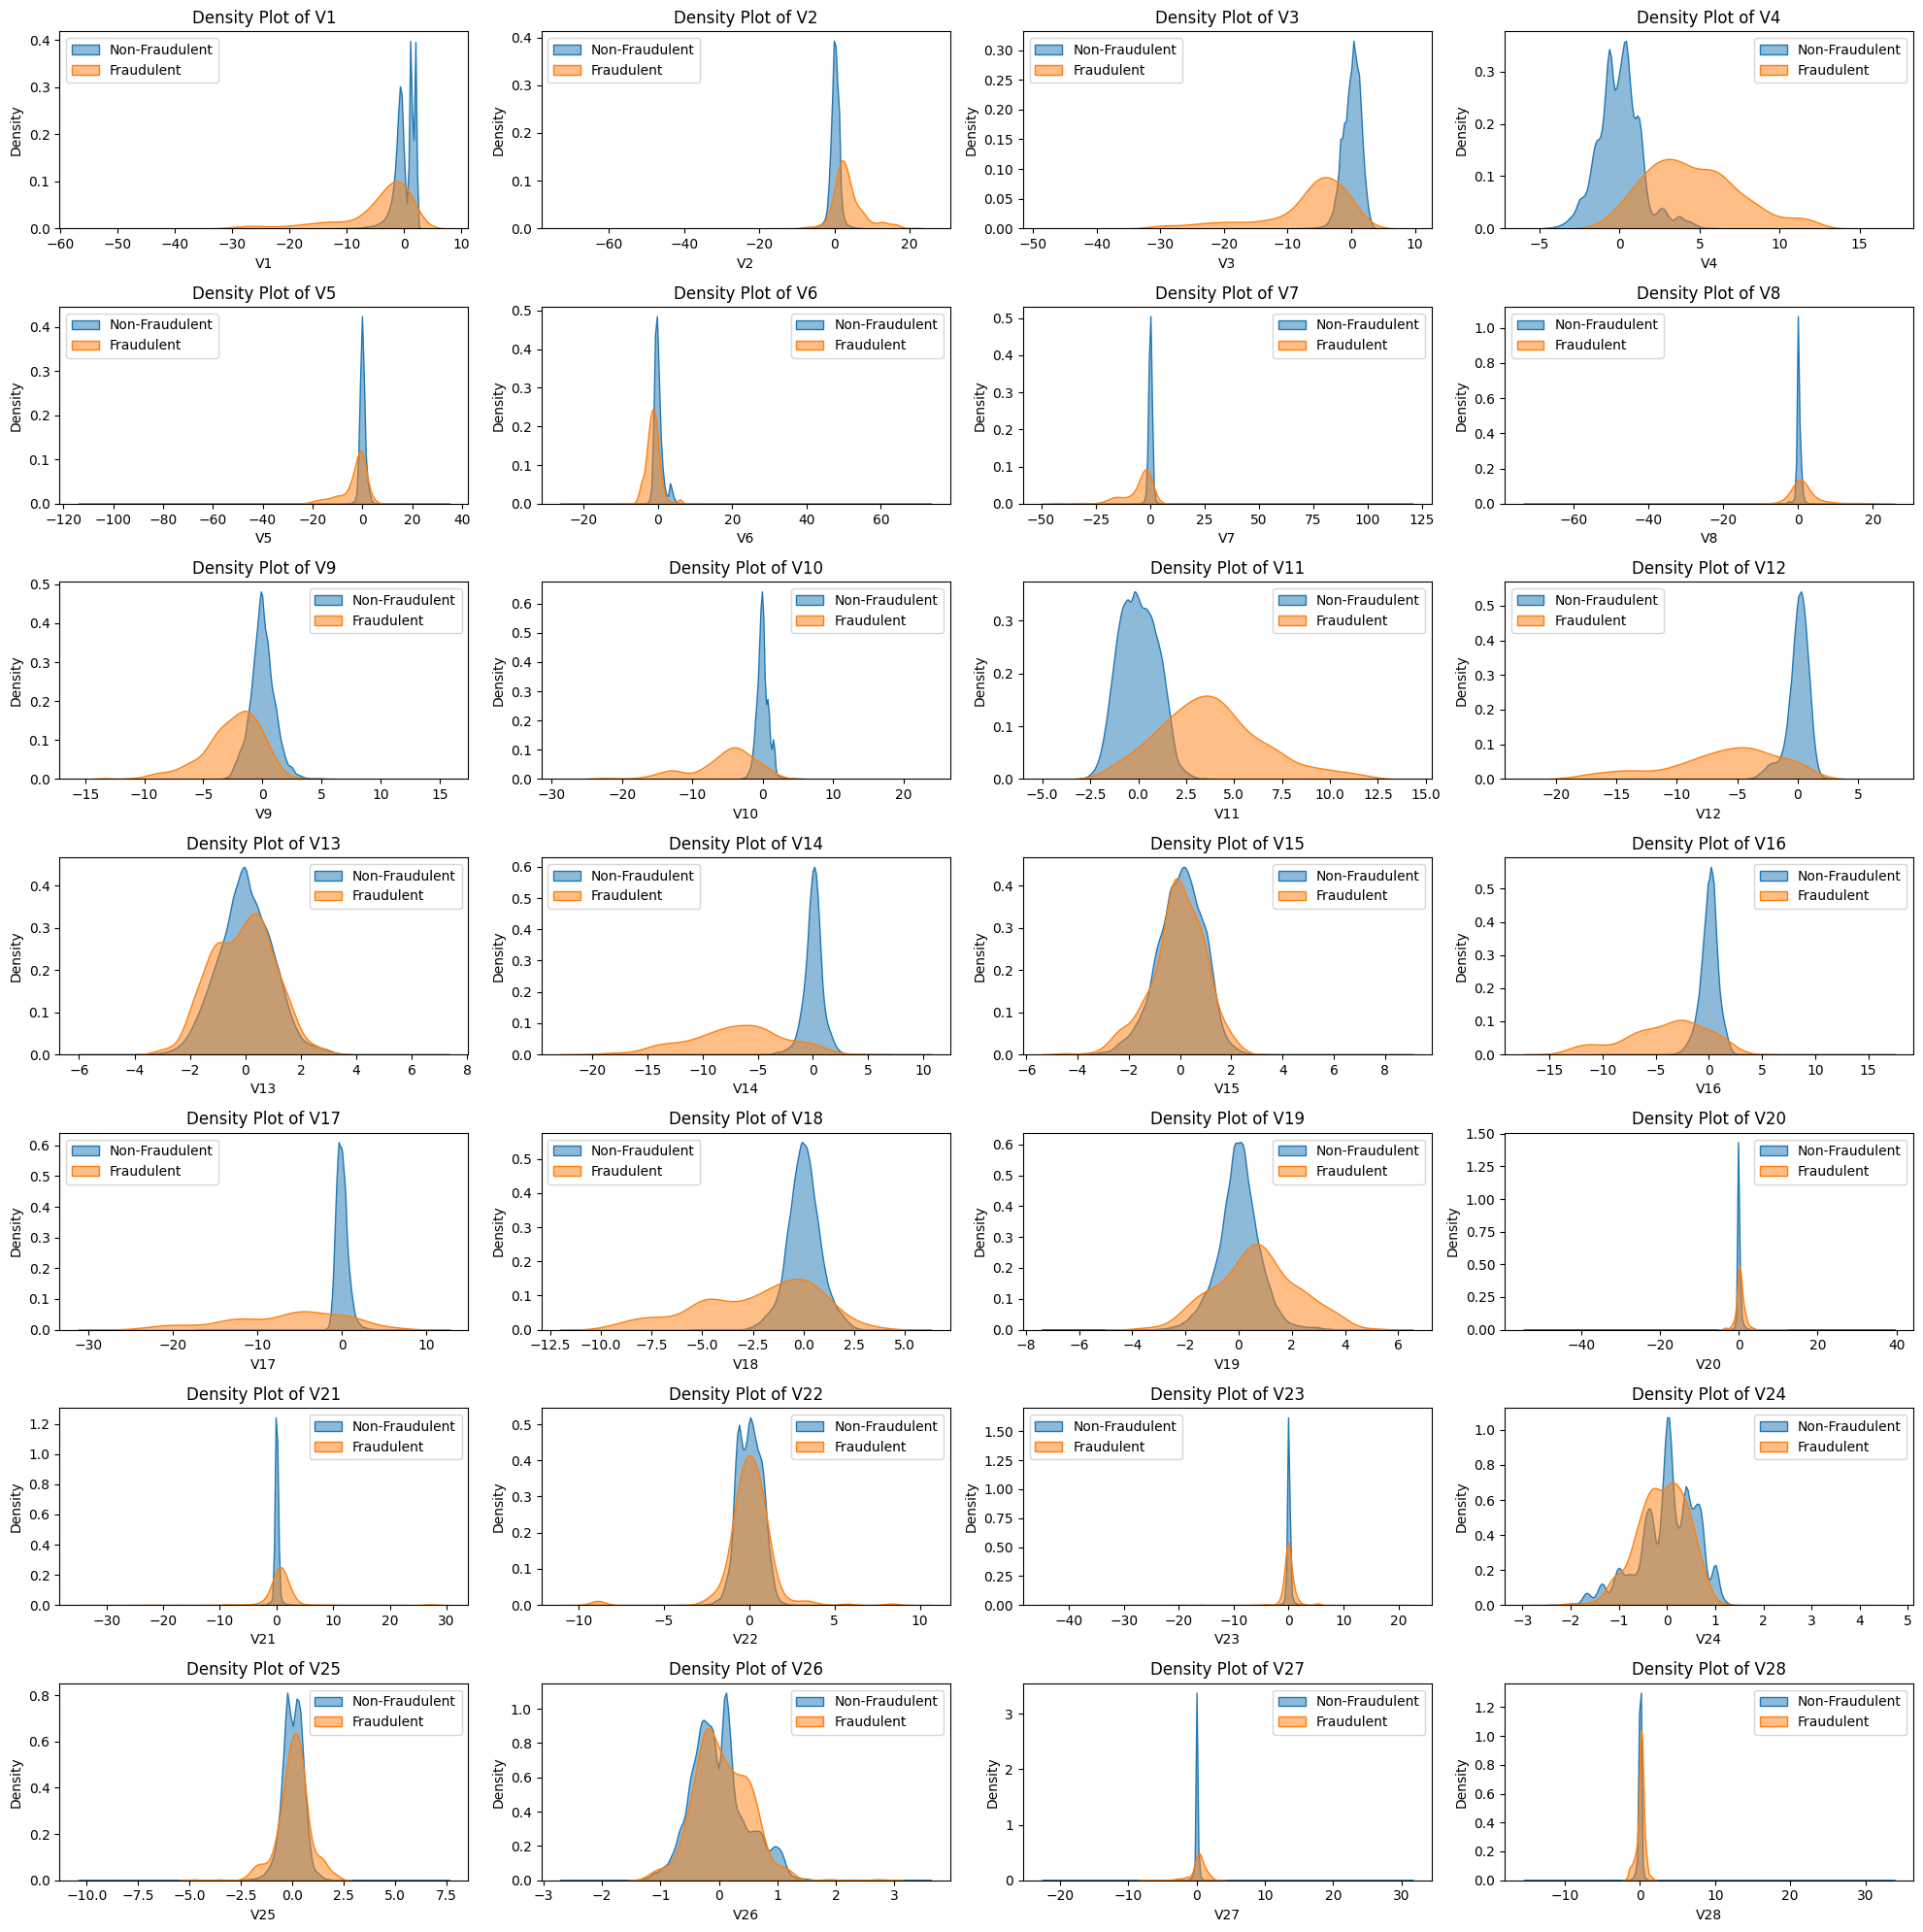

In [82]:
# Density plots for V1-V28 features by Class
features = [f'V{i}' for i in range(1, 29)]
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.kdeplot(data=df[df['Class'] == 0], x=feature, ax=axes[i], label='Non-Fraudulent', fill=True, alpha=0.5)
    sns.kdeplot(data=df[df['Class'] == 1], x=feature, ax=axes[i], label='Fraudulent', fill=True, alpha=0.5)
    axes[i].set_title(f'Density Plot of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].legend()
plt.tight_layout()
plt.show()

- For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1, V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile, whilst V25, V26, V28 have similar profiles for the two values of Class.